# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [35]:
def diagonales(n, d, C):

    meanClass0 = np.full(d,-1)
    meanClass1 = np.full(d, 1)

    standarDeviation = C * np.sqrt(d)
    
    covarianceMatrix = np.eye(d) * (standarDeviation ** 2)
    
    inputClass0 = np.random.multivariate_normal(meanClass0, covarianceMatrix, n//2)
    inputClass1 = np.random.multivariate_normal(meanClass1, covarianceMatrix, n//2)

    outputClass0 = np.full(n//2, 0)
    outputClass1 = np.full(n//2, 1)

    samplesDataFrame = pd.DataFrame({
        "Input"  : np.concatenate([inputClass0, inputClass1]).tolist(),
        "Output" : np.concatenate([outputClass0, outputClass1]).tolist()
    })

    return samplesDataFrame
    

Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

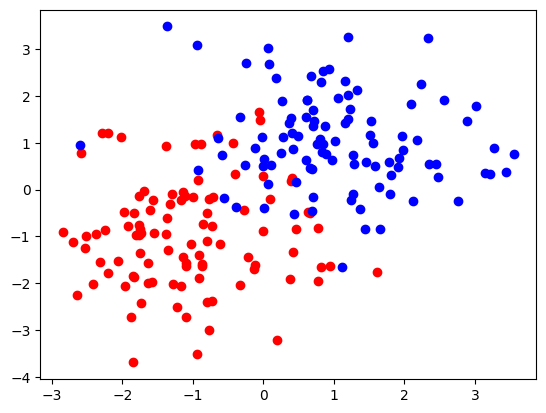

In [36]:
diag_df = diagonales(200, 2, 0.75)

# diferenciar entre clase 0 y clase 1
samplesClass0 = diag_df[diag_df["Output"] == 0]
samplesClass1 = diag_df[diag_df["Output"] == 1]

xs0 = np.array([entry[0] for entry in samplesClass0["Input"]])
ys0 = np.array([entry[1] for entry in samplesClass0["Input"]])
xs1 = np.array([entry[0] for entry in samplesClass1["Input"]])
ys1 = np.array([entry[1] for entry in samplesClass1["Input"]])

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [37]:
def paralelas(n, d, C):
    
    meanClass0 = np.full(d,0)
    meanClass0[0] = 1
    
    meanClass1 = np.full(d, 0)
    meanClass1[0] = -1

    standarDeviation = C
    
    covarianceMatrix = np.eye(d) * (standarDeviation ** 2)
    
    inputClass0 = np.random.multivariate_normal(meanClass0, covarianceMatrix, n//2)
    inputClass1 = np.random.multivariate_normal(meanClass1, covarianceMatrix, n//2)

    outputClass0 = np.full(n//2, 0)
    outputClass1 = np.full(n//2, 1)

    samplesDataFrame = pd.DataFrame({
        "Input"  : np.concatenate([inputClass0, inputClass1]).tolist(),
        "Output" : np.concatenate([outputClass0, outputClass1]).tolist()
    })

    return samplesDataFrame
    

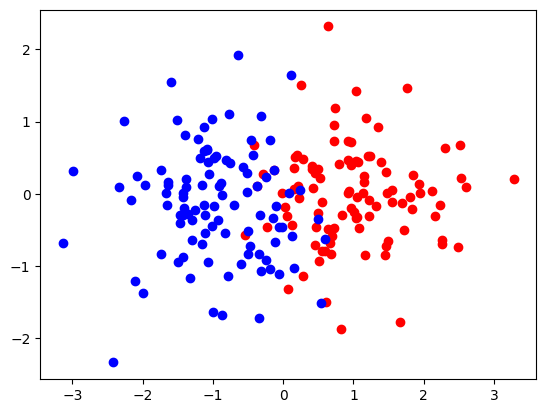

In [38]:
parallel_df = paralelas(200, 2, 0.75)

# diferenciar entre clase 0 y clase 1
samplesClass0 = parallel_df[parallel_df["Output"] == 0]
samplesClass1 = parallel_df[parallel_df["Output"] == 1]

xs0 = np.array([entry[0] for entry in samplesClass0["Input"]])
ys0 = np.array([entry[1] for entry in samplesClass0["Input"]])
xs1 = np.array([entry[0] for entry in samplesClass1["Input"]])
ys1 = np.array([entry[1] for entry in samplesClass1["Input"]])

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [39]:

def curve0(theta):
    return (theta) / (4 * np.pi)
    
def curve1(theta):
    return (theta +  + np.pi) / (4 * np.pi)

def chooseClass(entry):

    angle, radius = entry
    normalizedAngle = angle
    if (curve0(normalizedAngle) <= radius <= curve1(normalizedAngle)) or (curve0(normalizedAngle + 2 * np.pi) <= radius <= curve1(normalizedAngle + 2 * np.pi)) or (curve0(normalizedAngle - 2 * np.pi) <= radius <= curve1(normalizedAngle - 2 * np.pi)):
        return 0
    else:
        return 1

    

In [40]:
# def espirales(n):

#     maxRadius = 1
#     maxAngle = 2 * np.pi
    
#     inputClasses = np.random.uniform([0,0],[maxAngle, maxRadius], (n,2))
    
#     outputClasses = np.array([chooseClass(entry) for entry in inputClasses])
    
#     samplesDataFrame = pd.DataFrame({
#         "Input"  : inputClasses.tolist(),
#         "Output" : outputClasses.tolist()
#     })

#     return samplesDataFrame

In [41]:
def entre_curvas(rho, theta):
  rho_1 = theta/(4*math.pi)
  rho_2 = (theta + math.pi)/(4*math.pi)
  rho_3 = (theta + 2*math.pi)/(4*math.pi)
  rho_4 = (theta + 3*math.pi)/(4*math.pi)
  rho_5 = (theta + 4*math.pi)/(4*math.pi)
  rho_6 = (theta + 5*math.pi)/(4*math.pi)
  return (rho_1 < rho and rho < rho_2) or (rho_3 < rho and rho < rho_4) or (rho_5 < rho and rho < rho_6)


def espirales(n):

  inputs = []
  outputs = []

  cat0_t = 0
  cat1_t = 0
  while cat0_t + cat1_t != n:
    rho = math.sqrt(np.random.uniform())
    theta = np.random.uniform(-math.pi, math.pi)

    x = rho * math.cos(theta)
    y = rho * math.sin(theta)

    if entre_curvas(rho, theta) and cat0_t < n//2:
      inputs.append([x,y])
      outputs.append(0)
      cat0_t = cat0_t + 1
    elif (not entre_curvas(rho, theta)) and cat1_t < n//2:
      inputs.append([x,y])
      outputs.append(1)
      cat1_t = cat1_t + 1

  return pd.DataFrame({'input': inputs, 'output': outputs})


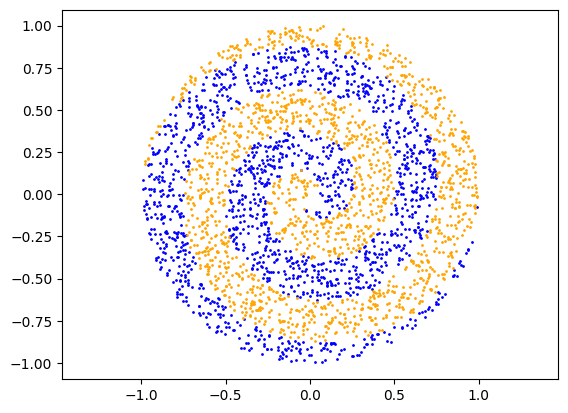

In [42]:
spiral_df = espirales(3000)

# diferenciar entre clase 0 y clase 1
samplesClass0 = spiral_df[spiral_df["output"] == 0]
samplesClass1 = spiral_df[spiral_df["output"] == 1]

xs0 = np.array([entry[0] for entry in samplesClass0["input"]])
ys0     = np.array([entry[1] for entry in samplesClass0["input"]])
xs1 = np.array([entry[0] for entry in samplesClass1["input"]])
ys1     = np.array([entry[1] for entry in samplesClass1["input"]])

plt.scatter(xs0, ys0, color='blue',s = 1)
plt.scatter(xs1, ys1, color='orange',s = 1)
plt.axis('equal')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Ejercicio 1

In [44]:
testSet = list(espirales(10000)["input"])
trainingSets = [espirales(150), espirales(600), espirales(3000)] 

classifiers = []
for i in range(3):
    classifiers.append(DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5))


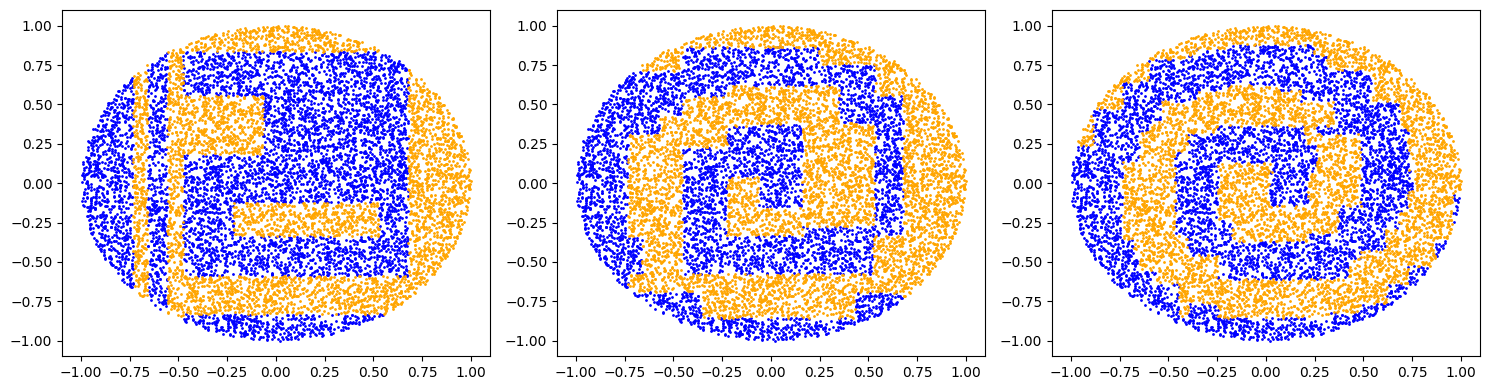

In [45]:
# Entrenamos cada clasificador
for i in range(3):
    classifiers[i].fit(list(trainingSets[i]["input"]), list(trainingSets[i]["output"]))

fig, axes = plt.subplots(1, 3, figsize = (15, 4))
for i, trainingSet in enumerate(trainingSets):

    predict = classifiers[i].predict(testSet)

    x0 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 0])
    y0 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 0])

    x1 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 1])
    y1 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 1])
     
    axes[i].scatter(x0, y0, color = "blue", s = 1)
    axes[i].scatter(x1, y1, color = "orange", s = 1)

plt.tight_layout()
plt.show()

# Ejercicio 2

In [46]:
import time

testSet = diagonales(10000, 2, 0.78)

setCount = 20
setSizes = [125, 250, 500, 1000, 2000, 4000]
setSizesCount = len(setSizes)
trainingSets = [[] for _ in range(len(setSizes))]

# Creamos los 20 conjuntos de entrenamiento para cada tamanio
for i, setSize in enumerate(setSizes):
    for _ in range(setCount):
        trainingSets[i].append(diagonales(setSize, 2, 0.78))
        # time.sleep(1)


In [47]:
classifiers = [[] for _ in range(setSizesCount)]

# Creamos los clasificadores
for classifierList in classifiers:
    for i in range(setCount):
        classifierList.append(DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5))

# Entrenamos los clasificadores
for i,classifierList in enumerate(classifiers):
    for j,classifier in enumerate(classifierList):
        classifier.fit(list(trainingSets[i][j]["Input"]), list(trainingSets[i][j]["Output"]))



In [48]:
from sklearn.metrics import zero_one_loss

trainingErrors = [[] for _ in range(setSizesCount)] 
testErrors = [[] for _ in range(setSizesCount)] 
treeSizes = [[] for _ in range(setSizesCount)] 

for i in range(setSizesCount):
    for j in range(setCount):

        classifier = classifiers[i][j]
        
        trainingPredict = classifier.predict(list(trainingSets[i][j]["Input"]))
        trainingLoss = zero_one_loss(trainingSets[i][j]["Output"], trainingPredict)

        trainingErrors[i].append(trainingLoss)

        testPredict = classifier.predict(list(testSet["Input"]))
        testLoss = zero_one_loss(testSet["Output"], testPredict)
        
        testErrors[i].append(testLoss)

        treeSizes[i].append(classifier.tree_.node_count)


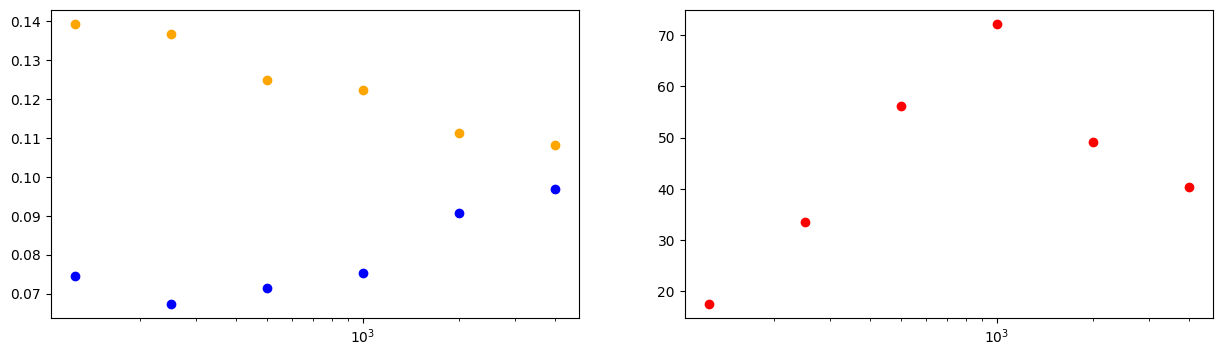

In [49]:
meanTrainingErrors = [np.mean(errorList) for errorList in trainingErrors]
meanTestErrors     = [np.mean(errorList) for errorList in testErrors]
meanTreeSizes      = [np.mean(sizeList) for sizeList in treeSizes]

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

# Grafica error de entrenamiento contra error de testeo
axes[0].scatter(setSizes, meanTrainingErrors, color = "blue")
axes[0].scatter(setSizes, meanTestErrors, color = "orange")

# Y los tamanios de los arboles
axes[1].scatter(setSizes, meanTreeSizes, color = "red")

# Setteamos la escala en logaritmica
axes[0].set_xscale("log")
axes[1].set_xscale("log")

plt.show()



# Ejercicio 3

# Ejercicio 5 - XOR


74
75
25
25
47
3


[]

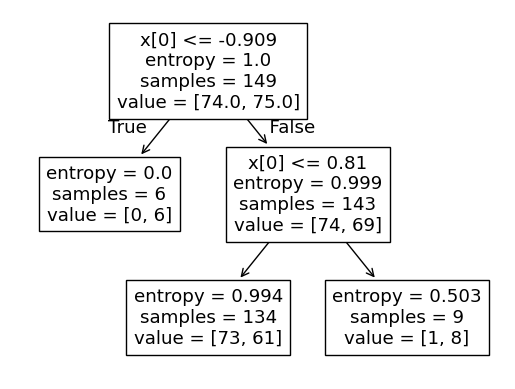

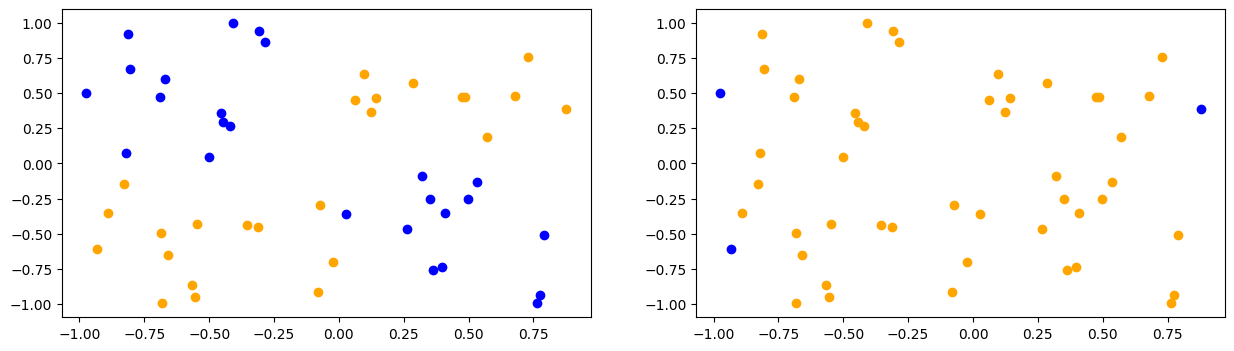

In [69]:
# Cargamos el archivo xor.csv como dataframe
xorDf = pd.read_csv('/home/octavio/materias/ia/aprendizaje_automatizado/xor.csv')
xorDf.columns = ["x", "y", "target"]

# Creamos el X y el y
X = xorDf[["x", "y"]]
y = xorDf["target"]

# Creamos su classifier
xorClassifier = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

# Creamos un split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(len(X_train[y_train == 0]))
print(len(X_train[y_train == 1]))



# Entrenamos sobre X_train
xorClassifier.fit(X_train, y_train)
tree.plot_tree(xorClassifier)

# Evaluamos en X_test y plotteamos ambas
y_predict = xorClassifier.predict(X_test)

# Separamos a los pares (x, y) de test en dos clases
X_test_class0 = X_test[y_test == 0] 
X_test_class1 = X_test[y_test == 1]  

# Y lo mismo pero considerando las predicciones
X_test_class0_pred = X_test[y_predict == 0] 
X_test_class1_pred = X_test[y_predict == 1]  

print(len(X_test_class0))
print(len(X_test_class1))


print(len(X_test_class0_pred))
print(len(X_test_class1_pred))

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
axes[0].scatter(X_test_class0["x"], X_test_class0["y"], color = "orange")
axes[0].scatter(X_test_class1["x"], X_test_class1["y"], color = "blue")

axes[1].scatter(X_test_class0_pred["x"], X_test_class0_pred["y"], color = "orange")
axes[1].scatter(X_test_class1_pred["x"], X_test_class1_pred["y"], color = "blue")

plt.plot()
